In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pwd

/content


In [3]:
!pwd
%cd "./gdrive/MyDrive/cs390"

/content
/content/gdrive/MyDrive/cs390


In [ ]:
res_model = ResNet50(include_top=False, weights='imagenet')
res_model.summary()

In [4]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
'''
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input
from keras.applications.resnet_v2 import decode_predictions
'''
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

#from keras.applications import ResNet50
#from keras.applications import preprocess_input
#from keras.applications import decode_predictions

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import pandas as pd
'''
res_model = tf.keras.applications.resnet152V2.ResNet152V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
'''
img_width = img_height = 224
bs = 32

train_df = pd.read_csv('./df_train.csv')
test_df = pd.read_csv('./df_test.csv')
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df, directory="./Selfie-dataset/images", 
                                              x_col="id", y_col="score", has_ext=True, 
                                              class_mode="other", target_size=(img_width, img_height), 
                                              batch_size=bs)
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, directory="./Selfie-dataset/images", 
                                              x_col="id", y_col="score", has_ext=True, 
                                              class_mode="other", shuffle=False, target_size=(img_width, img_height), 
                                              batch_size=1)


vgg_model = VGG16(weights="imagenet")
#res_model = ResNet50(include_top=False, weights='imagenet')

#for layer in res_model:
#    layer.trainable = False

model = Sequential()
#model.add(res_model)
for layer in vgg_model.layers[:-1]:
#for layer in res_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = True
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))


'''
def preprocess_image(image):
  image = load_img(image, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  return image

image = preprocess_image('airplane.jpeg')
guess = res_model.predict(image)
label = decode_predictions(guess)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))
'''
model.compile(Adam(lr=0.0001), loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit_generator(train_generator, epochs=5, verbose=1)
model.save('test_model_1.h5')



--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 37468 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 9368 validated image filenames.
553467904/553467096 [==============================] - 4s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
   3/1171 [..............................] - ETA: 1:34:23 - loss: 34.2077 - mean_squared_error: 34.2077

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
model_loaded = tf.keras.models.load_model('test_model_1.h5')
model_loaded.summary()

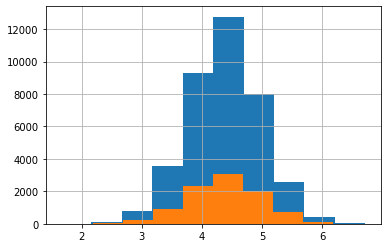

In [6]:
import pandas as pd
train_df = pd.read_csv('./df_train.csv')
train_df["score"].hist()
test_df = pd.read_csv('./df_test.csv')
test_df["score"].hist()

In [ ]:
def preprocess_image(image):
  image = load_img(image, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  return image

image = preprocess_image('/content/00a454da495e11e28a7322000a1fa414_6.jpg')
print(image)


In [8]:
yhat = model_loaded.predict_generator(test_generator, nb_samples, verbose=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


9368/9368 [==============================] - 1876s 200ms/step


In [11]:
yhat_train = model_loaded.predict_generator(train_generator_t, nt_samples, verbose=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


37468/37468 [==============================] - 7469s 199ms/step


In [ ]:
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, directory="./Selfie-dataset/images", 
                                              x_col="id", y_col="score", has_ext=True, 
                                              class_mode="other", shuffle=False, target_size=(img_width, img_height), 
                                              batch_size=1)
train_generator_t = test_datagen.flow_from_dataframe(dataframe=train_df, directory="./Selfie-dataset/images", 
                                              x_col="id", y_col="score", has_ext=True, 
                                              class_mode="other", shuffle=False, target_size=(img_width, img_height), 
                                              batch_size=1)
filenames = test_generator.filenames
nb_samples = len(filenames)
filenames = train_generator_t.filenames
nt_samples = len(filenames)

In [ ]:
test_df["score"].to_numpy()

array([4.159, 4.512, 4.363, ..., 3.577, 5.033, 5.096])

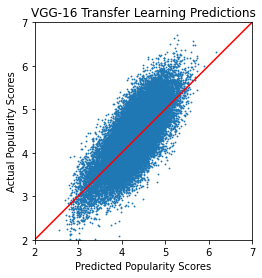

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(yhat_train, train_df["score"].to_numpy(), s=0.7)
plt.xlim(2, 7)
plt.ylim(2, 7)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("VGG-16 Transfer Learning Predictions")
plt.xlabel("Predicted Popularity Scores")
plt.ylabel("Actual Popularity Scores")
plt.plot([i for i in range(10)], [i for i in range(10)], color="red")

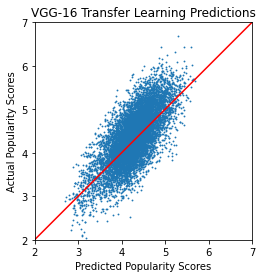

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(yhat, test_df["score"].to_numpy(), s=0.7)
plt.xlim(2, 7)
plt.ylim(2, 7)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("VGG-16 Transfer Learning Predictions")
plt.xlabel("Predicted Popularity Scores")
plt.ylabel("Actual Popularity Scores")
plt.plot([i for i in range(10)], [i for i in range(10)], color="red")

In [10]:
((yhat - test_df["score"].to_numpy()) ** 2).mean()

0.5478729148419262

In [2]:
((yhat_train - train_df["score"].to_numpy()) ** 2).mean()

NameError: ignored